In [1]:
# import common APIs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve

# sheet_1： 樣本數目超少難做出好結果

Sheet_1.csv contains 80 user responses, in the response_text column, to a therapy chatbot. Bot said: 'Describe a time when you have acted as a resource for someone else'.  User responded. If a response is 'not flagged', the user can continue talking to the bot. If it is 'flagged', the user is referred to help.

In [2]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/deepNLP/'
filename01 = 'sheet_1.csv'

df_full = pd.read_csv(os.path.join(filepath, filename01))
df_full.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


In [3]:
df_full = df_full.iloc[:,1:3] #去掉後面不需要的欄位

dict_label = {'not_flagged':0, 'flagged':1}
df_full['class'] = df_full['class'].map(dict_label)

In [4]:
df_full

,class,response_text
0,0,I try and avoid this sort of conflict
1,1,Had a friend open up to me about his mental ad...
2,1,I saved a girl from suicide once. She was goin...
3,0,i cant think of one really...i think i may hav...
4,0,Only really one friend who doesn't fit into th...
5,0,a couple of years ago my friends was going to ...
6,1,Roommate when he was going through death and l...
7,1,i've had a couple of friends (you could say mo...
8,0,Listened to someone talk about relationship tr...
9,1,I will always listen. I comforted my sister wh...


In [5]:
feature = df_full['response_text'].values
label = df_full['class'].values

cut_point = round(len(df_full)*0.8)
train_feature = np.array(feature[:cut_point])
train_label = np.array(label[:cut_point])
test_feature = np.array(feature[cut_point:])
test_label = np.array(label[cut_point:])

# Scikit-Learn: 直接交給vect做文字預處理，即可跑模型

In [28]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()

## naive_bayes.MultinomialNB()

In [39]:
from sklearn import naive_bayes

x_train, x_test, y_train, y_test = train_test_split(feature, label ,random_state=0)

x_train_dtm = vect.fit_transform(x_train) #把文本內容變成向量
x_test_dtm = vect.transform(x_test)

clf = naive_bayes.MultinomialNB()
clf.fit(x_train_dtm,y_train)
y_predict = clf.predict(x_test_dtm)

print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.70      0.54      0.61        13
          1       0.40      0.57      0.47         7

avg / total       0.59      0.55      0.56        20



## tree.DecisionTreeClassifier()

In [41]:
from sklearn import tree

x_train, x_test, y_train, y_test = train_test_split(feature, label ,random_state=0)

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

clf=tree.DecisionTreeClassifier()
clf.fit(x_train_dtm,y_train)
y_predict = clf.predict(x_test_dtm)

print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.70      0.54      0.61        13
          1       0.40      0.57      0.47         7

avg / total       0.59      0.55      0.56        20



## ensemble.RandomForestClassifier()

In [42]:
from sklearn import ensemble

x_train, x_test, y_train, y_test = train_test_split(feature, label ,random_state=0)

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

clf=ensemble.RandomForestClassifier()
clf.fit(x_train_dtm,y_train)
y_predict = clf.predict(x_test_dtm)

print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.68      1.00      0.81        13
          1       1.00      0.14      0.25         7

avg / total       0.79      0.70      0.62        20



## ensemble.AdaBoostClassifier()

In [43]:
from sklearn import ensemble

x_train, x_test, y_train, y_test = train_test_split(feature, label ,random_state=0)

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

clf=ensemble.AdaBoostClassifier()
clf.fit(x_train_dtm,y_train)
y_predict = clf.predict(x_test_dtm)

print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.83      0.77      0.80        13
          1       0.62      0.71      0.67         7

avg / total       0.76      0.75      0.75        20



# Keras: Tokenizer，texts_to_sequences，sequence.pad_sequences補齊

In [20]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

token = Tokenizer(num_words=20)
token.fit_on_texts(train_feature) #用token讀取新文字 

print(token.document_count)

64


In [21]:
print(token.word_index)

{'categories': 280, 'spiraling': 282, 'thoughts': 455, "that's": 116, 'known': 592, 'shelter': 392, 'lines': 582, 'overcome': 294, 'big': 193, 'open': 118, 'some': 36, 'sometimes': 113, 'pills': 274, 'talking': 254, 'couple': 176, 'another': 498, 'less': 420, 'thankgiving': 503, 'heard': 450, 'ago': 292, 'hits': 359, 'dealing': 135, 'level': 399, 'has': 207, 'struggle': 428, 'allowed': 361, 'kindness': 528, 'several': 362, 'intense': 544, 'it': 12, 'many': 235, 'self': 124, 'mind': 514, 'campsite': 377, 'top': 423, 'family': 444, 'little': 152, 'give': 132, 'from': 48, 'clean': 441, 'personal': 128, 'visited': 464, 'drove': 490, 'switched': 535, 'super': 489, 'best': 69, 'more': 65, 'now': 172, 'break': 550, 'expressing': 348, 'aunt': 565, 'advise': 344, 'you': 96, 'life': 46, 'turmoil': 598, 'fit': 278, 'set': 481, 'conflict': 267, 'reflect': 474, 'see': 214, 'hard': 236, 'off': 130, 'acted': 541, 'want': 117, 'might': 515, 'anxiety': 109, 'problems': 66, 'past': 605, 'sign': 414, 'th

In [22]:
x_train_seq = token.texts_to_sequences(train_feature)
x_test_seq  = token.texts_to_sequences(test_feature)

In [24]:
x_train_seq[0:5]

[[1, 3, 6],
 [4, 14, 2, 15, 2, 3, 12, 8, 3, 11],
 [1, 4, 17, 8, 2, 4, 6, 3, 1, 9, 6, 12, 16, 4],
 [1, 6, 1, 1],
 [14, 5, 6, 5, 9, 12, 17, 15, 17, 13, 9, 2, 15, 3, 9, 17, 15, 15, 5]]

In [25]:
x_test_seq[0:5]

[[7, 13, 9, 1, 2, 10, 9, 17, 12, 3, 2, 9],
 [18],
 [1, 4, 14, 2, 2, 3, 2, 2, 8, 10],
 [1, 13, 1, 4, 2],
 [2, 3, 13, 19, 12, 4]]

In [26]:
#由於ML的矩陣都是要長一樣的才能運算，所以取最多字20
#如果超過20字從前面開始砍掉，如果少於20字從前面開始補0
x_train = sequence.pad_sequences(x_train_seq, maxlen=20)
x_test  = sequence.pad_sequences(x_test_seq,  maxlen=20)

In [27]:
x_train.shape

(64, 20)

## MLP: 題目是NLP要加上Embedding層

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 32)            2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 20, 32)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                20512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
__________

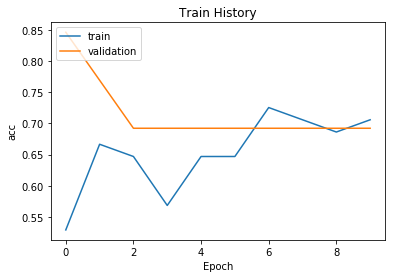

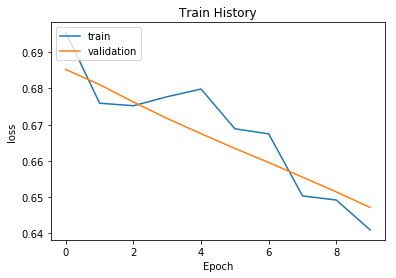

16/16 [==============================] - 0s


accuracy= 0.6875
16/16 [==============================] - 0s


In [30]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding

#設計模型
model = Sequential()

#Embedding，把文字向量投影到多維度向量（語意），否則數字之間無關聯，沒能體現出語言之間有「語意」
#在此投影成32維度
model.add(Embedding(output_dim = 32,
                    input_dim = 64,
                    input_length = 20))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())


#訓練模型
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

train_history = model.fit(x_train, train_label,
                          validation_split=0.2, batch_size=100, epochs=10, verbose=2)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(x_test, test_label)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(x_test)

#儲存訓練結果
#model.save_weights("Savemodel_Keras/IMDB_MLP.h5")
#print('\n model saved to disk')

## RNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 32)            2048      
_________________________________________________________________
dropout_14 (Dropout)         (None, 20, 32)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_14 (Dense)             (None, 256)               4352      
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 7,441
Trainable params: 7,441
Non-trainable params: 0
_________________________________________________________________
None
Tra

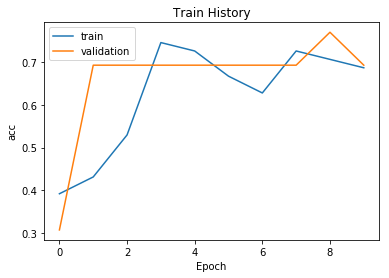

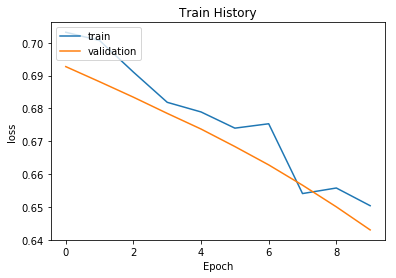

16/16 [==============================] - 0s


accuracy= 0.6875
16/16 [==============================] - 0s


In [33]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN #改SimpleRNN

model = Sequential()

model.add(Embedding(output_dim=32,
                    input_dim=64, 
                    input_length=20))
model.add(Dropout(0.35))

model.add(SimpleRNN(units=16)) ##改SimpleRNN

model.add(Dense(units=256,activation='relu' ))
model.add(Dropout(0.35))

model.add(Dense(units=1,activation='sigmoid' ))

print(model.summary())

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

train_history =model.fit(x_train, train_label, batch_size=100, 
                         epochs=10,verbose=2,
                         validation_split=0.2)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(x_test, test_label)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(x_test)

#儲存訓練結果
#model.save_weights("Savemodel_Keras/IMDB_RNN.h5")
#print('\n model saved to disk')

## LSTM

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 32)            2048      
_________________________________________________________________
dropout_18 (Dropout)         (None, 20, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 1312      
_________________________________________________________________
dense_18 (Dense)             (None, 256)               2304      
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 5,921
Trainable params: 5,921
Non-trainable params: 0
_________________________________________________________________
None
Tra

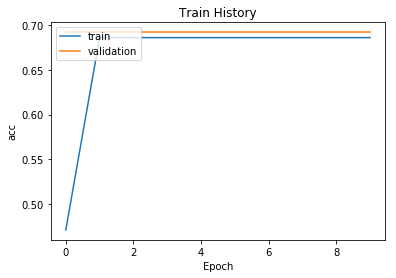

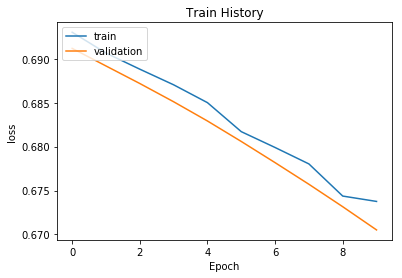

16/16 [==============================] - 0s


accuracy= 0.6875
16/16 [==============================] - 0s


In [35]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM #改成LSTM

model = Sequential()

model.add(Embedding(output_dim=32,
                    input_dim=64, 
                    input_length=20))
model.add(Dropout(0.35))

model.add(LSTM(units=8)) #改LSTM

model.add(Dense(units=256,activation='relu' ))
model.add(Dropout(0.35))

model.add(Dense(units=1,activation='sigmoid' ))

print(model.summary())

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

train_history =model.fit(x_train, train_label, batch_size=100, 
                         epochs=10,verbose=2,
                         validation_split=0.2)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(x_test, test_label)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(x_test)

# Twitter_airline_sentiment 實戰

In [44]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/Twitter_air_sentiment/'
filename02 = 'Tweets.csv'

df = pd.read_csv(os.path.join(filepath, filename02))
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [48]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [45]:
df.info() #答案label應該是airline_sentiment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [46]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [47]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

### 嘗試消除航空公司的tag，可是有點麻煩，改天研究

In [191]:
#消除掉航空公司的tag
airlines = ['@united ','@USAirways ','@AmericanAir ','@SouthwestAir ','@Delta ','@VirginAmerica ']
texts = df.text.values.tolist()
text_sub = []

for text in texts:
    count = 0
    for airline in airlines:
        count += 1
        if airline in text:
            tmp = text.replace(airline,'')
            text_sub.append(tmp)
        else:
            if count == 6:
                text_sub.append(text)

In [192]:
text_sub[0:5] #成功踢除航空公司tag

['What @dhepburn said.',
 "plus you've added commercials to the experience... tacky.",
 "I didn't today... Must mean I need to take another trip!",
 'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "and it's a really big bad thing about it"]

In [193]:
text_sub[-5:] #成功踢除航空公司tag

['@AmericanAir Please bring American Airlines to #BlackBerry10',
 "you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
 'we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?',
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']

In [194]:
len(text_sub)

26366

### 不拿掉航空公司的tag

In [195]:
feature = np.array(df['text'])

dict_label = {'negative':-1, 'neutral':0, 'positive':1}
label = df['airline_sentiment'].map(dict_label).values
label_onehot = pd.get_dummies(df['airline_sentiment'])


cut_point = round(len(df)*0.8)
train_feature = np.array(feature[:cut_point])
train_label = np.array(label[:cut_point])
train_label_onehot = np.array(label_onehot[:cut_point])

test_feature = np.array(feature[cut_point:])
test_label = np.array(label[cut_point:])
test_label_onehot = np.array(label_onehot[cut_point:])

# Scikit-Learn:不認真調參數的話，效果比訓練過後的DL還差

In [265]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()

## naive_bayes.MultinomialNB()

In [266]:
from sklearn import naive_bayes

x_train, x_test, y_train, y_test = train_test_split(feature, label ,random_state=0)

x_train_dtm = vect.fit_transform(x_train) #把文本內容變成向量
x_test_dtm = vect.transform(x_test)

clf = naive_bayes.MultinomialNB()
clf.fit(x_train_dtm,y_train)
y_predict = clf.predict(x_test_dtm)

print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

         -1       0.77      0.97      0.86      2327
          0       0.72      0.41      0.52       772
          1       0.87      0.48      0.62       561

avg / total       0.78      0.77      0.75      3660



In [273]:
#測試自創語句
string = ['I hate waiting. fuck you airline. They only want to take my money.',
          'I fucking love this airline',
          'I love this airline',
          'It rains a lot here',
          'Good job']
str_trans = vect.transform(string)
clf.predict(str_trans)

array([-1, -1,  1, -1,  1])

## ensemble.RandomForestClassifier()

In [241]:
from sklearn import ensemble

x_train, x_test, y_train, y_test = train_test_split(feature, label ,random_state=0)

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

clf=ensemble.RandomForestClassifier()
clf.fit(x_train_dtm, y_train)
y_predict = clf.predict(x_test_dtm)

print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

         -1       0.76      0.93      0.84      2327
          0       0.57      0.38      0.45       772
          1       0.74      0.40      0.52       561

avg / total       0.72      0.73      0.71      3660



## tree.DecisionTreeClassifier()

In [240]:
from sklearn import tree

x_train, x_test, y_train, y_test = train_test_split(feature, label ,random_state=0)

x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

clf=tree.DecisionTreeClassifier()
clf.fit(x_train_dtm,y_train)
y_predict = clf.predict(x_test_dtm)

print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

         -1       0.80      0.81      0.81      2327
          0       0.49      0.50      0.50       772
          1       0.58      0.52      0.55       561

avg / total       0.70      0.70      0.70      3660



# Keras: Tokenizer，texts_to_sequences，sequence.pad_sequences補齊

In [284]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

token = Tokenizer(num_words=5000)
token.fit_on_texts(train_feature) #用token讀取新文字 

print(token.document_count)

11712


In [285]:
print(token.word_index)

{'screwing': 3048, 'tennis': 8288, 'waitingagain': 13469, '423': 10154, '514': 7220, 'burn': 4861, '03': 4774, 'dominick': 12720, 'apparent': 3844, 'itravelalot': 10315, 'scale': 2738, 'flight911': 6773, 'unitedsucksdick': 7470, 'ixm3t5mizc': 11332, 'shameful': 1576, 'learning': 5682, '4124': 6463, 'cart': 2171, 'await': 12710, 'nbr': 5730, 'justgetmehome': 8188, 'elp': 7728, 'onlyblue': 11916, 'h6ce3mwcqj': 11979, 'moose': 6026, 'rocking': 5348, 'noservice': 4483, 'jerks': 13383, 'size': 1843, 'pooling': 3281, 'napkins': 10647, 'cough': 11446, 'failures': 3472, 'base': 3720, 'elizabeth': 8813, 'reposting': 14014, 'jknwugj778': 11885, 'predicted': 5562, 'looong': 4723, 'tgcyalate': 9640, "they're": 646, 'smelly': 13468, '3636': 7303, '56': 3512, 'interior': 6915, 'sprint': 6201, 'goodcustomerservice': 11398, '4229': 9597, 'mitchell': 12558, 'gsb2j3c4gm': 5925, 'o': 912, 'dragonss': 1738, 'daniel': 11098, 'whathappend': 9200, 'tells': 1039, 'risk': 2881, 'overwhelming': 5774, 'couple': 

In [286]:
x_train_seq = token.texts_to_sequences(train_feature)
x_test_seq  = token.texts_to_sequences(test_feature)

In [287]:
#由於ML的矩陣都是要長一樣的才能運算，所以取最多字20
#如果超過20字從前面開始砍掉，如果少於20字從前面開始補0
x_train = sequence.pad_sequences(x_train_seq, maxlen=100)
x_test  = sequence.pad_sequences(x_test_seq,  maxlen=100)

In [288]:
x_train.shape

(11712, 100)

In [289]:
train_label_onehot.shape

(11712, 3)

In [290]:
x_test.shape

(2928, 100)

In [291]:
test_label_onehot.shape

(2928, 3)

## 單純MLP訓練慢，但多步之後效果ok

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 100, 50)           585600    
_________________________________________________________________
dropout_59 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 5000)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 20)                100020    
_________________________________________________________________
dropout_60 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 3)                 63        
Total params: 685,683
Trainable params: 685,683
Non-trainable params: 0
_________________________________________________________________
None

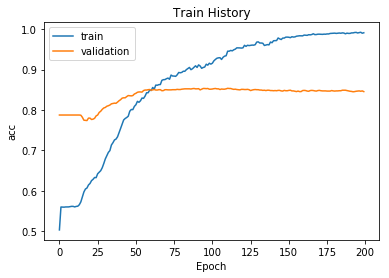

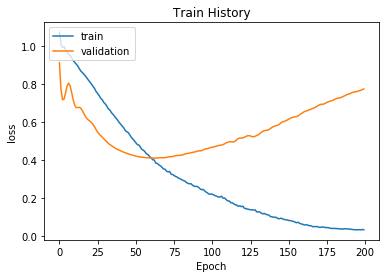

2528/2928 [========================>.....] - ETA: 0s

accuracy= 0.790642076503
2752/2928 [===========================>..] - ETA: 0s

In [252]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding

#設計模型
model = Sequential()

#Embedding，把文字向量投影到多維度向量（語意），否則數字之間無關聯，沒能體現出語言之間有「語意」
#在此投影成32維度
model.add(Embedding(output_dim = 50,
                    input_dim = 11712,
                    input_length = 100))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.35))

model.add(Dense(units=3, activation='softmax'))

print(model.summary())


#訓練模型
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

train_history = model.fit(x_train, train_label_onehot,
                          validation_split=0.2, batch_size=5000, epochs=200, verbose=2)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(x_test, test_label_onehot)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(x_test)

#儲存訓練結果
#model.save_weights("Savemodel_Keras/Sentiment_MLP.h5")
#print('\n model saved to disk')

In [254]:
model.save_weights("Savemodels/Airline_Sentiment_MLP.h5")
print('\n model saved to disk')


 model saved to disk


In [261]:
prediction[2]

1

In [282]:
string = ['I hate waiting. fuck you airline. They only want to take my money.', #0
          'I fucking love this airline', #2
          'I love this airline', #2
          'It rains a lot here', #1
          'Good job', #2
          'Be Aware, Delayed Flights', #0
          'Room for improvement is needed', #0~1
          'There is something really wrong with this airline how can the government condone big delays?', #0
          'Great Flight on a Budget Airline', #2
          'More than I expected', #2
          'This is what I wanted', #2
          'Hope my trip be smooth', #1
          'Delayed without any notification by more than 3 hours', #0
          'Everything in time. Good personal. Fine food onboard', #2
          'united','USAirways','AmericanAir','SouthwestAir','Delta','VirginAmerica'
         ]

str_token = token.texts_to_sequences(string)
str_token_seq_pad = sequence.pad_sequences(str_token, maxlen=100)

ans = model.predict_classes(str_token_seq_pad)
ans #0:negative, 1:neutral, 2:positive

20/20 [==============================] - 0s


array([0, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1])

## RNN: 較快又強

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 100, 100)          1171200   
_________________________________________________________________
dropout_75 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 20)                2420      
_________________________________________________________________
dense_75 (Dense)             (None, 100)               2100      
_________________________________________________________________
dropout_76 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 3)                 303       
Total params: 1,176,023
Trainable params: 1,176,023
Non-trainable params: 0
_________________________________________________________________


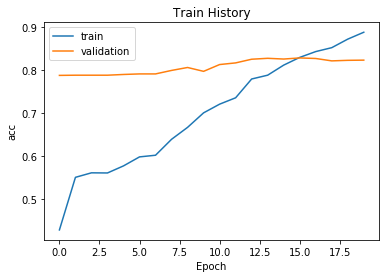

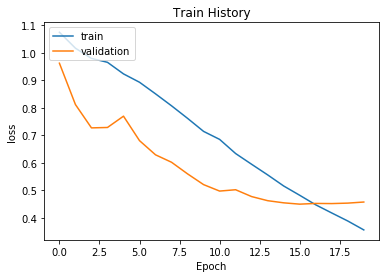

2912/2928 [============================>.] - ETA: 0s

accuracy= 0.781079234973
2928/2928 [==============================] - 4s     

 model saved to disk


In [300]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN #改SimpleRNN

model = Sequential()

model.add(Embedding(output_dim=100,
                    input_dim=11712, 
                    input_length=100))
model.add(Dropout(0.35))

model.add(SimpleRNN(units=20)) ##改SimpleRNN

model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.35))

model.add(Dense(units=3,activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

train_history =model.fit(x_train, train_label_onehot, batch_size=3000, 
                         epochs=20,verbose=2, validation_split=0.2) #epoch=40其實loss就最低了

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(x_test, test_label_onehot)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(x_test)

#儲存訓練結果
model.save_weights("Savemodels/Airline_Sentiment_RNN.h5")
print('\n model saved to disk')

In [301]:
string = ['I hate waiting. fuck you airline. They only want to take my money.', #0
          'I fucking love this airline', #2
          'I love this airline', #2
          'It rains a lot here', #1
          'Good job', #2
          'Be Aware, Delayed Flights', #0
          'Room for improvement is needed', #0~1
          'There is something really wrong with this airline how can the government condone big delays?', #0
          'Great Flight on a Budget Airline', #2
          'More than I expected', #2
          'This is what I wanted', #2
          'Hope my trip be smooth', #1
          'Delayed without any notification by more than 3 hours', #0
          'Everything in time. Good personal. Fine food onboard', #2
          'united','USAirways','AmericanAir','SouthwestAir','Delta','VirginAmerica'
         ]

str_token = token.texts_to_sequences(string)
str_token_seq_pad = sequence.pad_sequences(str_token, maxlen=100)

ans = model.predict_classes(str_token_seq_pad)
ans #0: negative, 1:neutral, 2:positive

20/20 [==============================] - 0s


array([0, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

## LSTM: 訓練慢，但效果最好！！

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 100, 100)          1171200   
_________________________________________________________________
dropout_77 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 20)                9680      
_________________________________________________________________
dense_77 (Dense)             (None, 100)               2100      
_________________________________________________________________
dropout_78 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 3)                 303       
Total params: 1,183,283
Trainable params: 1,183,283
Non-trainable params: 0
_________________________________________________________________


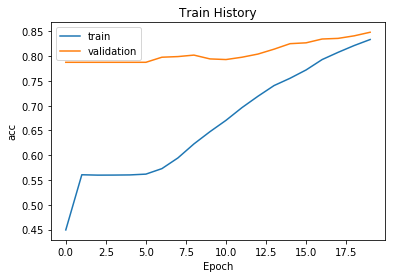

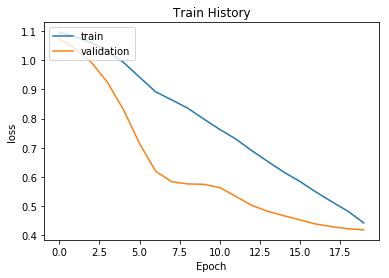

2928/2928 [==============================] - 10s    


accuracy= 0.782445355191
2928/2928 [==============================] - 13s    

 model saved to disk


In [302]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM #改成LSTM

model = Sequential()

model.add(Embedding(output_dim=100,
                    input_dim=11712, 
                    input_length=100))
model.add(Dropout(0.35))

model.add(LSTM(units=20)) #改LSTM

model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.35))

model.add(Dense(units=3,activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

train_history =model.fit(x_train, train_label_onehot, batch_size=3000, 
                         epochs=20,verbose=2,
                         validation_split=0.2)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(x_test, test_label_onehot)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(x_test)

#儲存訓練結果
model.save_weights("Savemodels/Airline_Sentiment_LSTM.h5")
print('\n model saved to disk')

In [303]:
string = ['I hate waiting. fuck you airline. They only want to take my money.', #0
          'I fucking love this airline', #2
          'I love this airline', #2
          'It rains a lot here', #1
          'Good job', #2
          'Be Aware, Delayed Flights', #0
          'Room for improvement is needed', #0~1
          'There is something really wrong with this airline how can the government condone big delays?', #0
          'Great Flight on a Budget Airline', #2
          'More than I expected', #2
          'This is what I wanted', #2
          'Hope my trip be smooth', #1
          'Delayed without any notification by more than 3 hours', #0
          'Everything in time. Good personal. Fine food onboard', #2
          'united','USAirways','AmericanAir','SouthwestAir','Delta','VirginAmerica'
         ]

str_token = token.texts_to_sequences(string)
str_token_seq_pad = sequence.pad_sequences(str_token, maxlen=100)

ans = model.predict_classes(str_token_seq_pad)
ans #0: negative, 1:neutral, 2:positive

20/20 [==============================] - 0s


array([0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1])